<a href="https://colab.research.google.com/github/hsilva-unam/THC_Semestre_06_01/blob/main/THC_HectorSilva_25_11_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/mike1502/THC/main/Python/Aplicaciones/MinimosCuadrados/MinimosCuadrados.csv"
df = pd.read_csv(url)  # si usas ; como separador: pd.read_csv(url, delimiter=";")
x = df["x"].to_numpy()
y = df["y"].to_numpy()
print(x)
print(y)

# Datos obtenidos de
# K.F. Riley, M. P. Hobson, S. J. Bence, 2006
# Mathematical Methods for Physics and Engineering.
# Cambridge University Press, 3rd Edition, 1363.

[1.85 2.72 2.81 3.06 3.42 3.76 4.31 4.47 4.64 4.99]
[2.26 3.1  3.8  4.11 4.74 4.31 5.24 4.03 5.69 6.57]


Pendiente 1.209984355797966
Ordenada al origen 0.02542636605992854


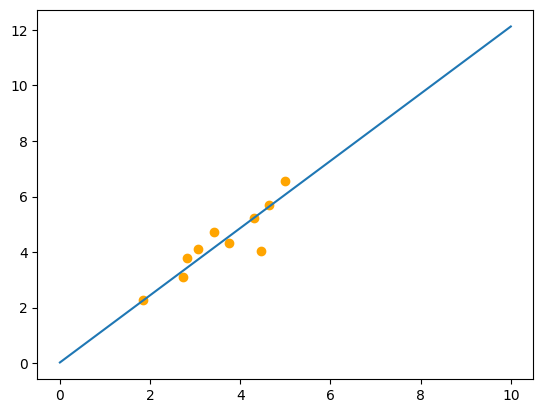

In [21]:
m=(len(x)*np.sum(x*y)-np.sum(x*y))/(len(x)*np.sum(x*x)-np.sum(x*x))
b=(np.sum(y)-m*np.sum(x))/(len(x))


print('Pendiente', m)
print('Ordenada al origen', b)

xp=np.linspace(0,10,100)
yp=m*xp+b

plt.scatter(x,y, color = 'orange')
plt.plot(xp,yp)


In [30]:
yp1=m*x+b
res=y-yp1
err=np.abs(res/y)*100
print('Error', err)

Error [1.72452402e-01 6.98657464e+00 9.85572616e+00 9.29492713e+00
 1.21609101e+01 6.14773884e+00 8.75838834e-03 3.48401101e+01
 8.83061916e-01 7.71311565e+00]


Varianza 0.37078753688687666
Desviacion estandar 0.6089232602609927


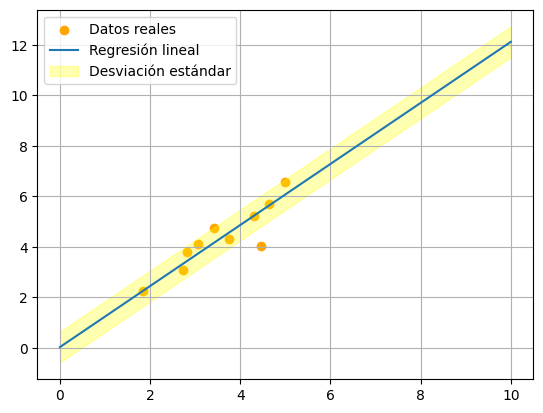

In [53]:
media=np.mean(y)
varianza=np.sum(res**2)/(len(x)-2)
desv_std=np.sqrt(varianza)
print('Varianza', varianza)
print('Desviacion estandar', desv_std)

lin_sup = yp + desv_std
lin_inf = yp - desv_std

plt.scatter(x,y, color = 'orange')
plt.plot(xp,yp)
plt.fill_between(xp, lin_inf, lin_sup, color = 'yellow', alpha = 0.3, label = 'Banda de color')
plt.legend(['Datos reales', 'Regresión lineal', 'Desviación estándar'])
plt.grid()
plt.show()




In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

-0.005716456678518833 1.1491159490857963 0.3241375618478699


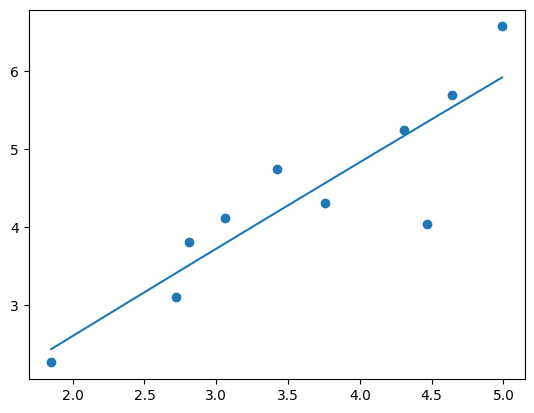

In [71]:
poly=PolynomialFeatures(degree=2, include_bias=True)
x_poly=poly.fit_transform(x.reshape(-1, 1))
model=LinearRegression()
model.fit(x_poly,y)

c=model.intercept_
a, b =model.coef_[2], model.coef_[1]
print(a,b,c)

x_fit=np.linspace(min(x),max(x),300).reshape(-1,1)
y_fit_transformed=poly.transform(x_fit)
yfinal=model.predict(y_fit_transformed)

plt.scatter(x,y)
plt.plot(x_fit,yfinal)


0.34814917424630565 -3.5282439682829856 12.404347928894811 -10.935065842229788


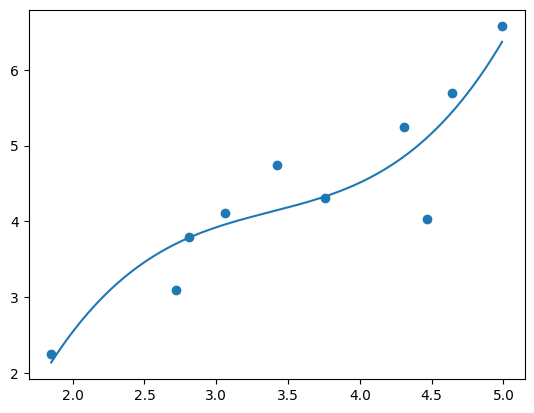

In [75]:
poly=PolynomialFeatures(degree=3, include_bias=True)
x_poly=poly.fit_transform(x.reshape(-1, 1))
model=LinearRegression()
model.fit(x_poly,y)

d=model.intercept_
a, b, c =model.coef_[3], model.coef_[2], model.coef_[1]
print(a,b,c,d)

x_fit=np.linspace(min(x),max(x),300).reshape(-1,1)
y_fit_transformed=poly.transform(x_fit)
yfinal=model.predict(y_fit_transformed)

plt.scatter(x,y)
plt.plot(x_fit,yfinal)
